In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
from math import inf

# Zad 1 - Metoda potęgowa

In [7]:
def calculate_dominant_vectors(matrix: np.ndarray, epsilon, max_iter):
    n = matrix.shape[0]
    prev = np.zeros(n)
    curr = np.random.rand(n)
    curr = curr/np.linalg.norm(curr)
    i = 0
    while np.linalg.norm(prev - curr) > epsilon and i < max_iter:
        i+=1
        prev = curr.copy()
        curr = np.dot(matrix, curr)
        curr = curr/np.linalg.norm(curr)
    return curr/np.linalg.norm(curr), np.sign(curr[np.argmax(np.abs(curr))])*np.linalg.norm(curr)
def generate_square_matrix(n):
    m = np.random.random_integers(0, 2000, size=(n, n))
    return (m + m.T)/2

C:\Users\franc\AppData\Local\Temp\ipykernel_10112\1030414144.py:14: DeprecationWarning: This function is deprecated. Please call randint(0, 2000 + 1) instead
  m = np.random.random_integers(0, 2000, size=(n, n))


99635.60759045446
499838.4580980043
1000346.4681383522
2000077.0019504668


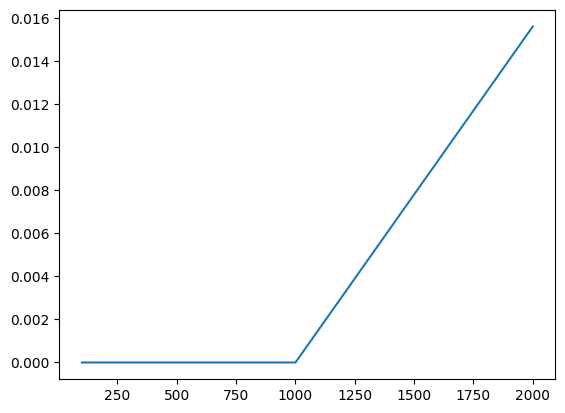

In [ ]:
sizes = [100, 500, 1000, 2000]
times = []
eps = 0.00001
max_iter = 100000
for n in sizes:
    matrix = generate_square_matrix(n)
    start = time.process_time()
    eigenvector, egienvalue = calculate_dominant_vectors(matrix, eps, max_iter)
    end = time.process_time()
    real_v, _ = np.linalg.eig(matrix)
    eigv = real_v.min() if abs(real_v.min()) > abs(real_v.max()) else real_v.max()
    diff = abs(abs(egienvalue) - abs(egienvalue))
    print(diff)
    times.append(end-start)
plt.plot(sizes, times)

# Zad 2 - odwrotna metoda potęgowa

In [4]:
import scipy as sci

In [5]:
def reverse_power_method(matrix: np.ndarray, sigma, epsilon, max_iter):
    n = matrix.shape[0]
    matrix = np.linalg.inv(matrix - sigma*np.identity(n))
    lu = sci.linalg.lu_factor(matrix)
    prev = np.zeros(n)
    curr = np.random.rand(n)
    i = 0
    while np.linalg.norm(prev - curr) > epsilon and i < max_iter:
        i+=1
        prev = curr.copy()
        curr = sci.linalg.lu_solve(lu, curr)
        curr = curr/np.linalg.norm(curr)
    
    return curr/np.linalg.norm(curr), np.sign(curr[np.argmax(np.abs(curr))])*np.linalg.norm(curr)

C:\Users\franc\AppData\Local\Temp\ipykernel_12728\1030414144.py:14: DeprecationWarning: This function is deprecated. Please call randint(0, 2000 + 1) instead
  m = np.random.random_integers(0, 2000, size=(n, n))


100539.86993596356


C:\Users\franc\AppData\Local\Temp\ipykernel_12728\1030414144.py:14: DeprecationWarning: This function is deprecated. Please call randint(0, 2000 + 1) instead
  m = np.random.random_integers(0, 2000, size=(n, n))


500163.1229568233
1000702.9767965255
2002517.1691839425


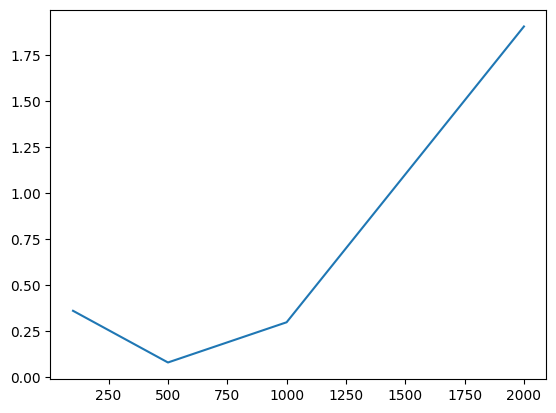

In [8]:
sizes = [100, 500, 1000, 2000]
times = []
eps = 0.0001
sigma = 100
max_iter = 100000
for n in sizes:
    matrix = generate_square_matrix(n)
    start = time.process_time()
    eigenvectors, egienvalue = reverse_power_method(matrix, sigma*n, eps, max_iter)
    end = time.process_time()
    real_v, _ = np.linalg.eig(matrix)
    eigv = real_v.min() if abs(real_v.min()) > abs(real_v.max()) else real_v.max()
    diff = abs(abs(eigv) - abs(egienvalue))
    print(diff)
    times.append(end-start)
plt.plot(sizes, times)

# Zad 3 - Iteracje z ilorazem Rayleigha

In [9]:
def rayleigh_iteration(matrix, epsilon, max_iter):
    def r(x):
        return np.dot(np.dot(x, matrix), x.T)/np.dot(x, x.T)
    n = matrix.shape[0]
    prev = np.zeros(n)
    curr = np.random.rand(n)
    matrix = np.linalg.inv(matrix - r(curr)*np.identity(n))
    i = 0
    while np.linalg.norm(prev - curr) > epsilon and i < max_iter:
        i+=1
        prev = curr.copy()
        curr = np.linalg.solve(matrix-r(curr)*np.identity(n), curr)
        curr = curr/np.linalg.norm(curr)
    
    return curr/np.linalg.norm(curr), np.sign(curr[np.argmax(np.abs(curr))])*np.linalg.norm(curr)

C:\Users\franc\AppData\Local\Temp\ipykernel_12728\1030414144.py:14: DeprecationWarning: This function is deprecated. Please call randint(0, 2000 + 1) instead
  m = np.random.random_integers(0, 2000, size=(n, n))


100301.09747905227
500820.32019434025
1001308.5908978933
2000403.558105756


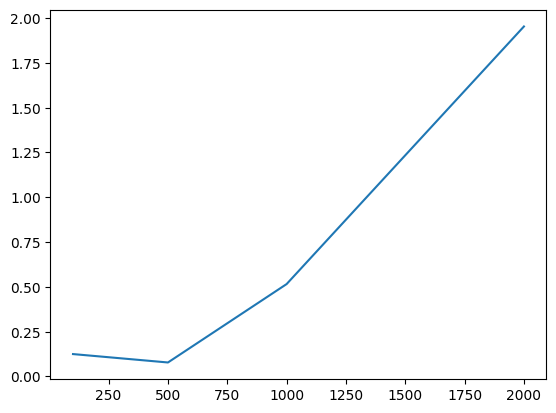

In [10]:
sizes = [100, 500, 1000, 2000]
times = []
eps = 0.0001
sigma = 100
max_iter = 100000
for n in sizes:
    matrix = generate_square_matrix(n)
    start = time.process_time()
    eigenvectors, egienvalue = rayleigh_iteration(matrix, eps, max_iter)
    end = time.process_time()
    diff = inf
    real_v, _ = np.linalg.eig(matrix)
    eigv = real_v.min() if abs(real_v.min()) > abs(real_v.max()) else real_v.max()
    diff = abs(abs(eigv) - abs(egienvalue))
    print(diff)
    times.append(end-start)
plt.plot(sizes, times)